#                DATA CLEANING OF bom.movie_gross.csv file
In data cleaning we will perform the following; 
  1. Handling missing values
  2. Datatype format
  3. Handling duplicates
  4. Checking column consistency.
  
First we will load the dataset then display the first few rows of the dataframe in order to understand its structure.


In [1]:
import pandas as pd
import sqlite3
from sqlalchemy import create_engine
import numpy as np
from scipy import stats
import itertools
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import zipfile
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.stats import linregress

In [2]:
# Load the datasetbom.movie_gross.csv.gz
file_path = 'bom.movie_gross.csv'
bomdf = pd.read_csv(file_path)

bomdf.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [3]:
bomdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


The dataframe contains 5 columns and 3387 rows.
The following are the columns with their brief information;

     1. TITLE; Represents name of the films(Object)
     2. STUDIO; Studio name(Object, with some missing values)
     3. DOMESTIC_GROSS; Domestic gross revenue(Float64, with some missing values)
     4. FOREIGN_GROSS; Foreign gross revenue(Object, with several missing values)
     5. YEAR; Year of production(int64)
     
For 'Studio' and 'Domestic_gross' we are goint to handle missing values while for 'Foreign_gross' we will convert to numeric then handle missing values. Finally we will display the cleaned dataframe.

In [4]:

bomdf = bomdf[['domestic_gross', 'foreign_gross', 'studio', 'year']]

# Drop rows with missing values in critical columns
data_cleaned = bomdf.dropna(subset=['domestic_gross', 'foreign_gross', 'studio', 'year'])

# Standardize the 'studio' column
data_cleaned['studio'] = data_cleaned['studio'].str.lower().str.strip()


# Drop duplicates if any
data_cleaned = data_cleaned.drop_duplicates()

# Verify cleaned data
print(data_cleaned['studio'].unique())
print(data_cleaned[['domestic_gross', 'foreign_gross', 'year']].dtypes)


['bv' 'wb' 'p/dw' 'sum.' 'par.' 'uni.' 'fox' 'wein.' 'sony' 'foxs' 'sgem'
 'wb (nl)' 'lgf' 'mbox' 'cl' 'w/dim.' 'cbs' 'focus' 'mgm' 'over.' 'mira.'
 'ifc' 'cj' 'nm' 'spc' 'parv' 'gold.' 'js' 'ratt.' 'magn.' 'free' '3d'
 'utv' 'rela.' 'zeit.' 'anch.' 'pda' 'lorb.' 'app.' 'drft.' 'osci.' 'iw'
 'rog.' 'eros' 'relbig.' 'viv.' 'hann.' 'strand' 'nge' 'scre.' 'kino'
 'abr.' 'cz' 'ato' 'first' 'gk' 'find.' 'nfc' 'tfc' 'pala.' 'imag.' 'nav'
 'arth.' 'cls' 'mont.' 'olive' 'cgld' 'foak' 'ivp' 'yash' 'icir' 'wow'
 'fm' 'fd' 'vari.' 'tris' 'orf' 'im' 'elev.' 'cohen' 'neoc' 'jan.' 'mne'
 'trib.' 'vita.' 'rocket' 'omni/fsr' 'kkm' 'argo.' 'libre' 'frun' 'p4'
 'kc' 'mpft' 'icar.' 'agf' 'nyer' 'lg/s' 'whe' 'wgusa' 'mpi' 'rtwc' 'fip'
 'rf' 'kl' 'arcent' 'paluni' 'epicpics' 'eone' 'af' 'ld' 'tfa' 'wamcr'
 'pm&e' 'a24' 'distrib.' 'imax' 'ph' 'da.' 'e1' 'shout!' 'sv' 'ce' 'vpd'
 'ke' 'outs' 'htr' 'dr' 'ampl.' 'cp' 'bgp' 'crnth' 'lgp' 'ec' 'fun' 'stx'
 'bg' 'pfr' 'bst' 'fcw' 'u/p' 'uhe' 'fr' 'orch.' 'pbs' 'i

<ipython-input-4-6b7a83fe7939>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['studio'] = data_cleaned['studio'].str.lower().str.strip()


In [5]:
bomdf.head(10)

,domestic_gross,foreign_gross,studio,year
0,415000000.0,652000000,BV,2010
1,334200000.0,691300000,BV,2010
2,296000000.0,664300000,WB,2010
3,292600000.0,535700000,WB,2010
4,238700000.0,513900000,P/DW,2010
5,300500000.0,398000000,Sum.,2010
6,312400000.0,311500000,Par.,2010
7,200800000.0,391000000,BV,2010
8,251500000.0,291600000,Uni.,2010
9,217600000.0,277300000,P/DW,2010


The cleaned data now has 3345 rows and 4 columns. 

# EDA Analysis

Univariate analysis

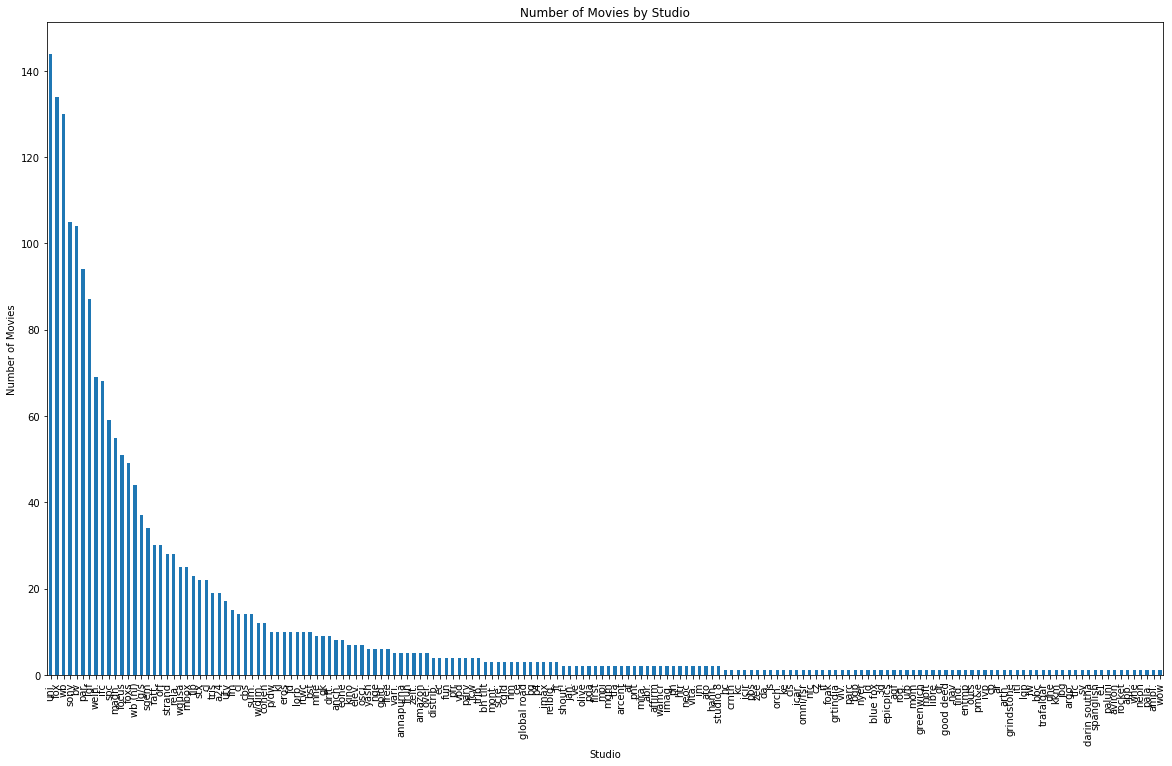

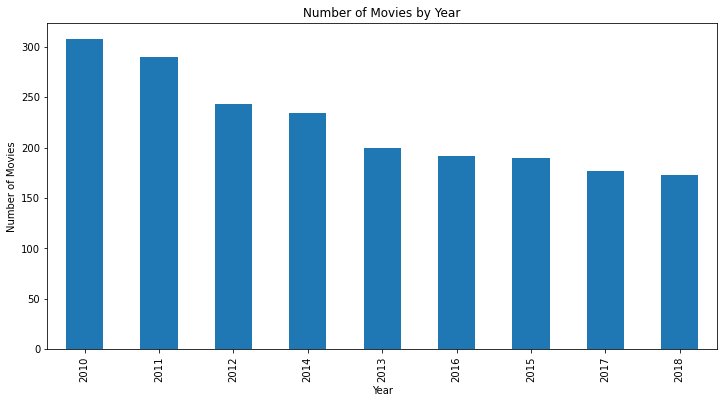

In [6]:
#Number of movies by studio
data_cleaned['studio'].value_counts().plot(kind='bar', figsize=(20, 12))
plt.xlabel('Studio')
plt.ylabel('Number of Movies')
plt.title('Number of Movies by Studio')
plt.show()

#Number of movies by year
data_cleaned['year'].value_counts().plot(kind='bar', figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies by Year')
plt.show()

Bivariate analysis

In [7]:
# Check for missing or incorrect data
print(data_cleaned[['domestic_gross', 'foreign_gross']].describe())
print(data_cleaned[['domestic_gross', 'foreign_gross']].info())

# Ensure data is numeric and handle missing values
data_cleaned['domestic_gross'] = pd.to_numeric(data_cleaned['domestic_gross'], errors='coerce')
data_cleaned['foreign_gross'] = pd.to_numeric(data_cleaned['foreign_gross'], errors='coerce')

# Drop rows with missing values (optional, based on your data handling policy)
data_cleaned = data_cleaned.dropna(subset=['domestic_gross', 'foreign_gross'])



       domestic_gross
count    2.007000e+03
mean     4.701984e+07
std      8.162689e+07
min      4.000000e+02
25%      6.700000e+05
50%      1.670000e+07
75%      5.605000e+07
max      9.367000e+08
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   domestic_gross  2007 non-null   float64
 1   foreign_gross   2007 non-null   object 
dtypes: float64(1), object(1)
memory usage: 47.0+ KB
None


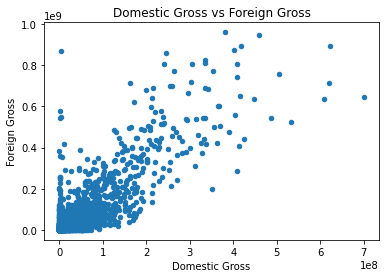

In [8]:
#Domestic vs Foreign Gross
data_cleaned.plot.scatter(x='domestic_gross', y='foreign_gross')
plt.xlabel('Domestic Gross')
plt.ylabel('Foreign Gross')
plt.title('Domestic Gross vs Foreign Gross')
plt.show()


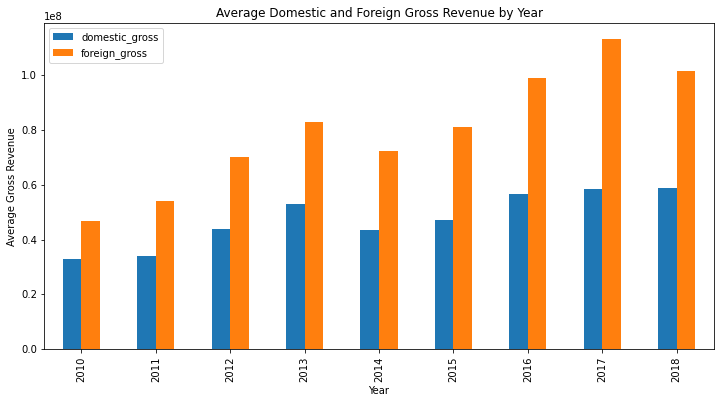

In [9]:
#Gross Revenue by Year
data_cleaned.groupby('year').mean()[['domestic_gross', 'foreign_gross']].plot(kind='bar', figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Average Gross Revenue')
plt.title('Average Domestic and Foreign Gross Revenue by Year')
plt.show()


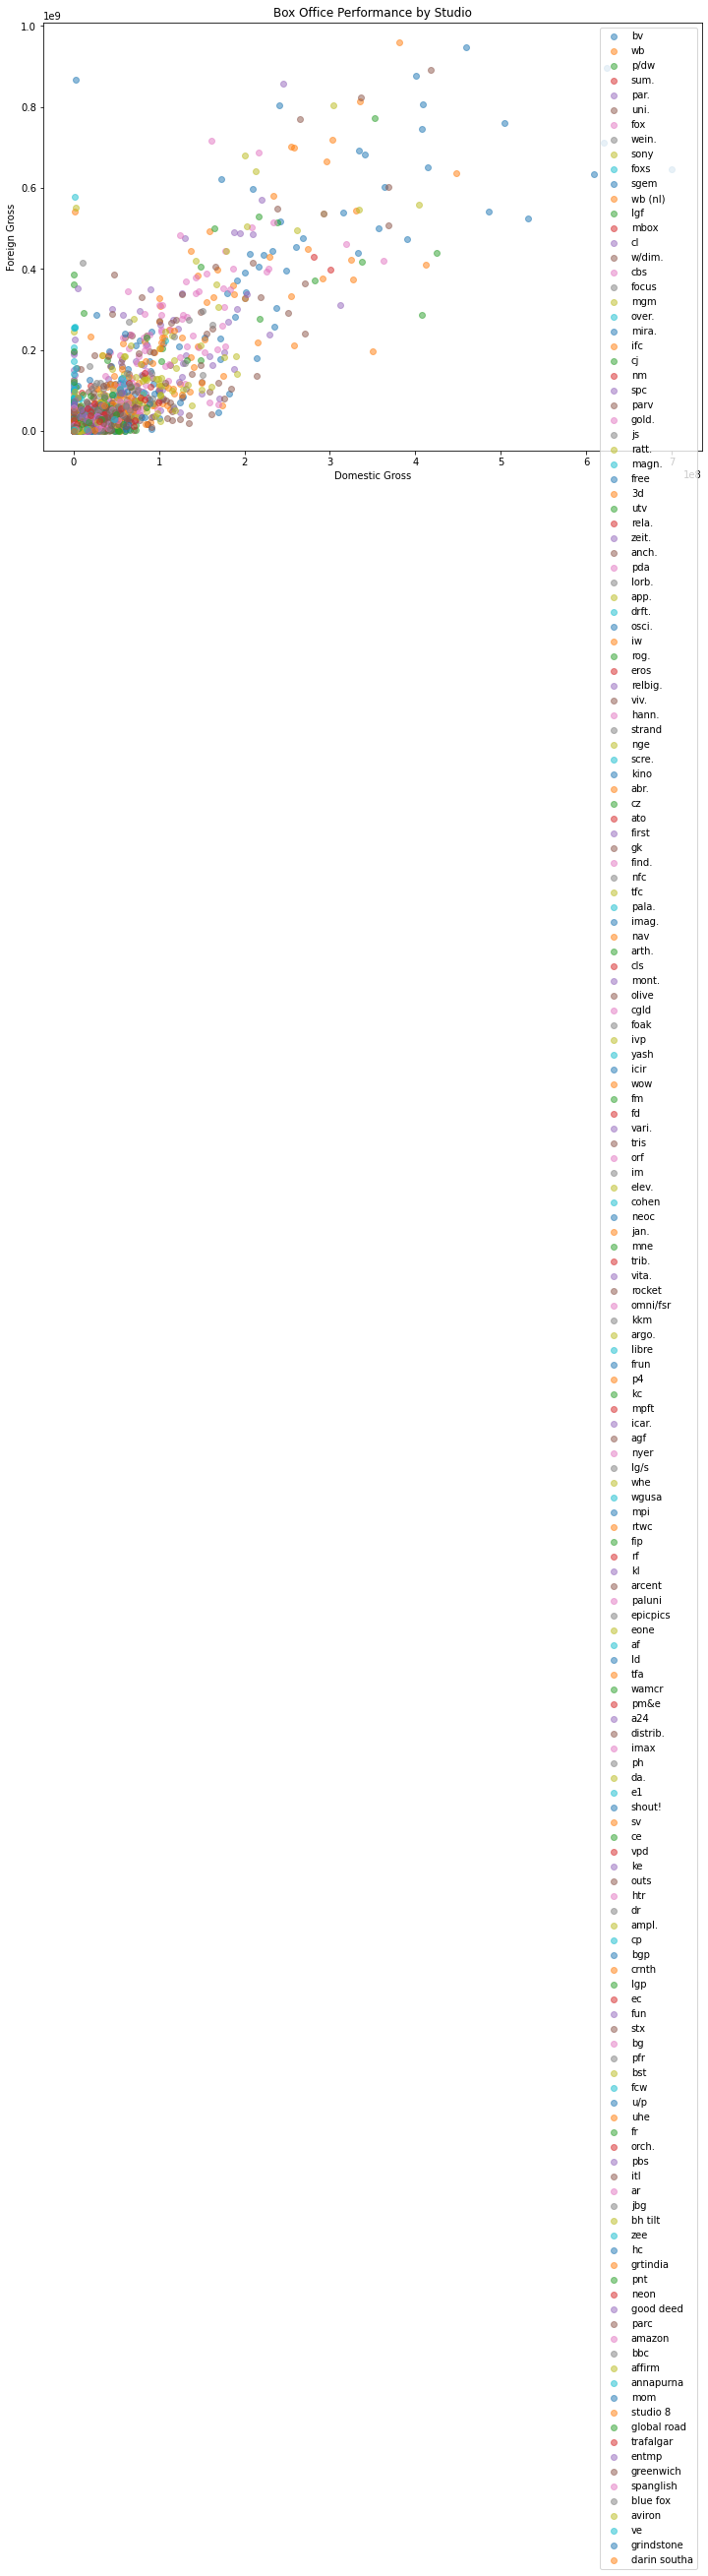

In [10]:
#Box Office Performance
studios = data_cleaned['studio'].unique()
plt.figure(figsize=(12, 8))
for studio in studios:
    studio_data = data_cleaned[data_cleaned['studio'] == studio]
    plt.scatter(studio_data['domestic_gross'], studio_data['foreign_gross'], label=studio, alpha=0.5)

plt.xlabel('Domestic Gross')
plt.ylabel('Foreign Gross')
plt.title('Box Office Performance by Studio')
plt.legend()
plt.show()


In [11]:
#Top Grossing Films
top_domestic = data_cleaned.sort_values(by='domestic_gross', ascending=False).head(10)
top_foreign = data_cleaned.sort_values(by='foreign_gross', ascending=False).head(10)

("Top 10 Domestic Grossing Films:")
print(top_domestic[['domestic_gross', 'studio', 'year']])

("\nTop 10 Foreign Grossing Films:")
print(top_foreign[['foreign_gross', 'studio', 'year']])

      domestic_gross studio  year
3080     700100000.0     bv  2018
727      623400000.0     bv  2012
2758     620200000.0     bv  2017
3082     608600000.0     bv  2018
2323     532200000.0     bv  2016
2759     504000000.0     bv  2017
2324     486300000.0     bv  2016
1875     459000000.0     bv  2015
729      448100000.0     wb  2012
1131     424700000.0    lgf  2013
      foreign_gross studio  year
328     960500000.0     wb  2011
1875    946400000.0     bv  2015
727     895500000.0     bv  2012
3081    891800000.0   uni.  2018
1127    875700000.0     bv  2013
2764    867600000.0     hc  2017
1477    858600000.0   par.  2014
1876    823400000.0   uni.  2015
3083    812700000.0     wb  2018
1128    805800000.0     bv  2013


# Multivariate analysis

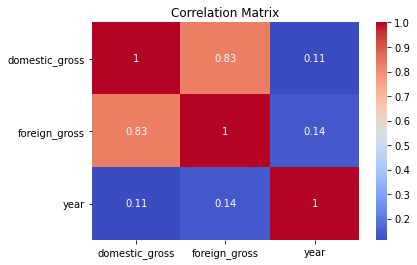

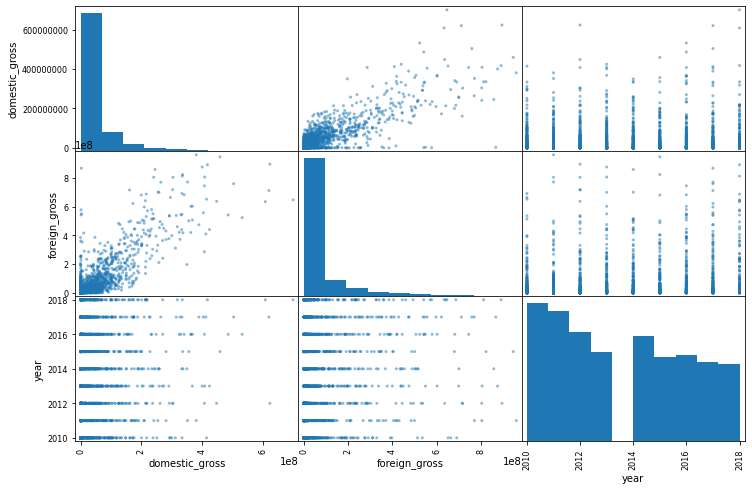

In [12]:
#Correlation analysis
corr = data_cleaned[['domestic_gross', 'foreign_gross', 'year']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#Scatter matrix
pd.plotting.scatter_matrix(data_cleaned[['domestic_gross', 'foreign_gross', 'year']], figsize=(12, 8))
plt.show()


# Hypothesis Testing

We are going to perform the following hypotheses;

  1. ANOVA
  2. t-test
  3. Pearson correlation

# 2. t-test

We shall perform both 0ne-tailed and two-tailed test.

First we will check form needed information then update our data on it.



In [13]:
unique_studios = bomdf['studio'].unique()
unique_studios

array(['BV', 'WB', 'P/DW', 'Sum.', 'Par.', 'Uni.', 'Fox', 'Wein.', 'Sony',
       'FoxS', 'SGem', 'WB (NL)', 'LGF', 'MBox', 'CL', 'W/Dim.', 'CBS',
       'Focus', 'MGM', 'Over.', 'Mira.', 'IFC', 'CJ', 'NM', 'SPC', 'ParV',
       'Gold.', 'JS', 'RAtt.', 'Magn.', 'Free', '3D', 'UTV', 'Rela.',
       'Zeit.', 'Anch.', 'PDA', 'Lorb.', 'App.', 'Drft.', 'Osci.', 'IW',
       'Rog.', nan, 'Eros', 'Relbig.', 'Viv.', 'Hann.', 'Strand', 'NGE',
       'Scre.', 'Kino', 'Abr.', 'CZ', 'ATO', 'First', 'GK', 'FInd.',
       'NFC', 'TFC', 'Pala.', 'Imag.', 'NAV', 'Arth.', 'CLS', 'Mont.',
       'Olive', 'CGld', 'FOAK', 'IVP', 'Yash', 'ICir', 'FM', 'Vita.',
       'WOW', 'Truly', 'Indic.', 'FD', 'Vari.', 'TriS', 'ORF', 'IM',
       'Elev.', 'Cohen', 'NeoC', 'Jan.', 'MNE', 'Trib.', 'Rocket',
       'OMNI/FSR', 'KKM', 'Argo.', 'SMod', 'Libre', 'FRun', 'WHE', 'P4',
       'KC', 'SD', 'AM', 'MPFT', 'Icar.', 'AGF', 'A23', 'Da.', 'NYer',
       'Rialto', 'DF', 'KL', 'ALP', 'LG/S', 'WGUSA', 'MPI', 'RTWC', 'FIP

In [14]:
major_studios = bomdf['studio'].unique()
major_studios

array(['BV', 'WB', 'P/DW', 'Sum.', 'Par.', 'Uni.', 'Fox', 'Wein.', 'Sony',
       'FoxS', 'SGem', 'WB (NL)', 'LGF', 'MBox', 'CL', 'W/Dim.', 'CBS',
       'Focus', 'MGM', 'Over.', 'Mira.', 'IFC', 'CJ', 'NM', 'SPC', 'ParV',
       'Gold.', 'JS', 'RAtt.', 'Magn.', 'Free', '3D', 'UTV', 'Rela.',
       'Zeit.', 'Anch.', 'PDA', 'Lorb.', 'App.', 'Drft.', 'Osci.', 'IW',
       'Rog.', nan, 'Eros', 'Relbig.', 'Viv.', 'Hann.', 'Strand', 'NGE',
       'Scre.', 'Kino', 'Abr.', 'CZ', 'ATO', 'First', 'GK', 'FInd.',
       'NFC', 'TFC', 'Pala.', 'Imag.', 'NAV', 'Arth.', 'CLS', 'Mont.',
       'Olive', 'CGld', 'FOAK', 'IVP', 'Yash', 'ICir', 'FM', 'Vita.',
       'WOW', 'Truly', 'Indic.', 'FD', 'Vari.', 'TriS', 'ORF', 'IM',
       'Elev.', 'Cohen', 'NeoC', 'Jan.', 'MNE', 'Trib.', 'Rocket',
       'OMNI/FSR', 'KKM', 'Argo.', 'SMod', 'Libre', 'FRun', 'WHE', 'P4',
       'KC', 'SD', 'AM', 'MPFT', 'Icar.', 'AGF', 'A23', 'Da.', 'NYer',
       'Rialto', 'DF', 'KL', 'ALP', 'LG/S', 'WGUSA', 'MPI', 'RTWC', 'FIP

In [24]:
# Split data into major and other studios
major_studios_gross = bomdf[bomdf['is_major_studio'] == 1]['domestic_gross']
other_studios_gross = bomdf[bomdf['is_major_studio'] == 0]['domestic_gross']

# Perform t-test
t_stat, p_value = ttest_ind(major_studios_gross, other_studios_gross)
print(f"T-test: t-statistic = {t_stat}, p-value = {p_value}")


T-test: t-statistic = nan, p-value = nan


C:\Users\BENNLANGAT\anaconda3\envs\learn-env\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [37]:
from scipy.stats import ttest_ind 
t_stat, p_value_two_tailed = ttest_ind(major_studios_gross, other_studios_gross, equal_var=False)


if t_stat > 0:
    p_value_one_tailed = p_value_two_tailed / 2
else:
    p_value_one_tailed = 1 - (p_value_two_tailed / 2)

print(f"T-test: t-statistic = {t_stat}, one-tailed p-value = {p_value_one_tailed}")

T-test: t-statistic = nan, one-tailed p-value = nan


C:\Users\BENNLANGAT\anaconda3\envs\learn-env\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


# 2. ANOVA

In [26]:
from scipy.stats import f_oneway

# Group data by year and calculate domestic gross
year_groups = [group['domestic_gross'].values for name, group in bomdf.groupby('year')]

# Perform ANOVA
f_stat, p_value = f_oneway(*year_groups)
print(f"ANOVA: F-statistic = {f_stat}, p-value = {p_value}")


ANOVA: F-statistic = nan, p-value = nan


# Linear Regression Analysis

In [39]:
import pandas as pd
import numpy as np
from scipy.stats import linregress
#Find linear regression of yearly average gross of domestic gross
yearly_avg_gross = bomdf.groupby('year')['domestic_gross'].mean().reset_index()
slope, intercept, r_value, p_value, std_err = linregress(yearly_avg_gross['year'], yearly_avg_gross['domestic_gross'])

(f"Linear regression: slope = {slope}, intercept = {intercept}, r-value = {r_value}, p-value = {p_value}, std err = {std_err}")





'Linear regression: slope = 577776.8483679781, intercept = -1134423292.7912571, r-value = 0.38302452546522375, p-value = 0.30891824510890364, std err = 526663.7456627247'

LinearRegression()
Mean Squared Error: 6711546168048729.0


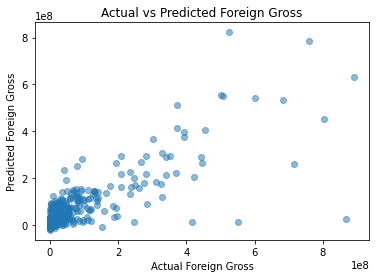

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
#Linear Regression on'Actual and Predicted Foreign Gross  
data_encoded = pd.get_dummies(data_cleaned, columns=['studio'])

X = data_encoded[['domestic_gross', 'year'] + [col for col in data_encoded.columns if col.startswith('studio_')]]
y = data_encoded['foreign_gross']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
print(model.fit(X_train, y_train))

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Foreign Gross')
plt.ylabel('Predicted Foreign Gross')
plt.title('Actual vs Predicted Foreign Gross')

plt.show()




# Further Understanding of Linear Regression.
#Stepwise

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# One-hot encode the studio column
data_encoded = pd.get_dummies(data_cleaned, columns=['studio'])

In [31]:
# Prepare the data for regression
X = data_encoded[['domestic_gross', 'year'] + [col for col in data_encoded.columns if col.startswith('studio_')]]
y = data_encoded['foreign_gross']

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Features and target
X = data_cleaned[['domestic_gross']]
y = data_cleaned['foreign_gross']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Print model coefficients
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)


Coefficients: [1.50730377]
Intercept: 5870704.985380605


In [34]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 6923932796254033.0


In [35]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
print(model.fit(X_train, y_train))

LinearRegression()


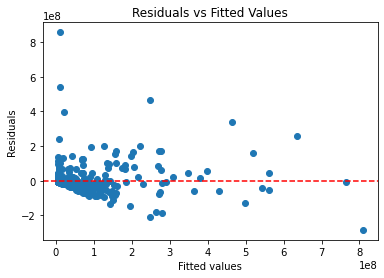

In [36]:


# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.scatter(y_pred, residuals)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.axhline(0, color='red', linestyle='--')
plt.show()
